<a href="https://colab.research.google.com/github/nisha1365/THINKSTATSBOOK/blob/main/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


Given a list of values, there are several ways to count the frequency of each value.


In [ ]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [ ]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a Counter

In [ ]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the Hist object provided by thinkstats2:

In [ ]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

Hist provides Freq, which looks up the frequency of a value.

In [ ]:
hist.Freq(2)

2

You can also use the bracket operator,

In [ ]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [ ]:
hist[4]


0

The Values method returns the values:

In [ ]:
hist.Values()


dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [ ]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the Items method:

In [ ]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


thinkplot is a wrapper for matplotlib that provides functions that work with the objects in thinkstats2.

For example Hist plots the values and their frequencies as a bar graph.

Config takes parameters that label the x and y axes, among other things.

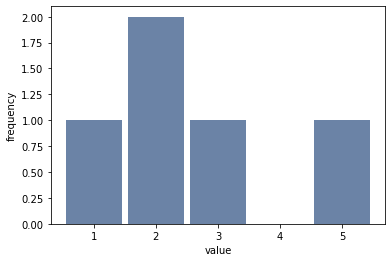

In [ ]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

load the data from the pregnancy file and select the records for live births.

In [ ]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [ ]:
import nsfg

In [ ]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]


Here's the histogram of birth weights in pounds. Notice that Hist works with anything iterable, including a Pandas Series. The label attribute appears in the legend when you plot the Hist.

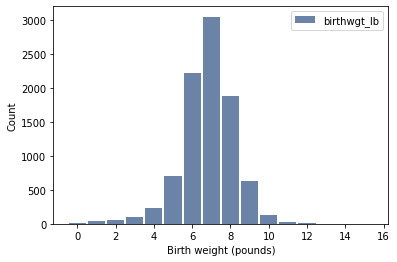

In [ ]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

I'll apply floor to round down:

In [ ]:
ages = np.floor(live.agepreg)

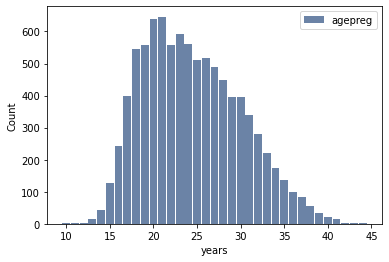

In [ ]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

plot the histogram of pregnancy lengths (column prglngth).

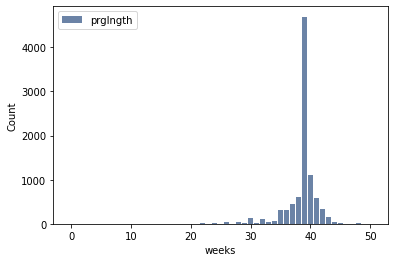

In [ ]:
# Solution

hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

Hist provides smallest, which select the lowest values and their frequencies.

In [ ]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use Largest to display the longest pregnancy lengths.

In [ ]:
# Solution

for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using birthord, then compute histograms of pregnancy length for the two groups.

In [ ]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use width and align to plot two histograms side-by-side.

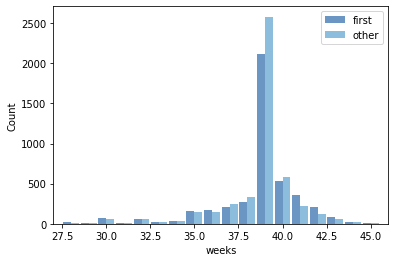

In [ ]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [ ]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [ ]:
mean, std

(38.56055968517709, 2.702343810070587)

As an exercise, confirm that std is the square root of var:

In [ ]:
# Solution

np.sqrt(var) == std

True

In [ ]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [ ]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [ ]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [ ]:

# Solution

CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449834

# Exercises

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.

Compute Cohen’s effect size to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [ ]:
# Solution

firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [ ]:
# Solution

CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.08867292707260174

For the next few exercises, we'll load the respondent file:

In [ ]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [ ]:
resp = nsfg.ReadFemResp()

Make a histogram of totincr the total income for the respondent's family

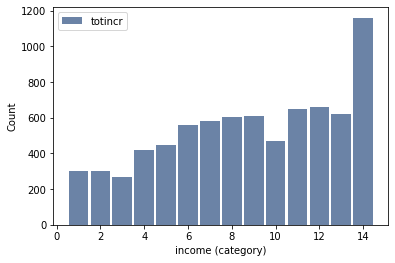

In [ ]:
# Solution

hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist, label='totincr')
thinkplot.Config(xlabel='income (category)', ylabel='Count')

Make a histogram of age_r, the respondent's age at the time of interview.

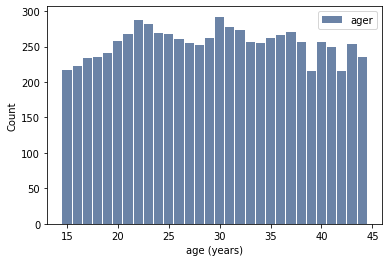

In [ ]:
# Solution

hist = thinkstats2.Hist(resp.ager)
thinkplot.Hist(hist, label='ager')
thinkplot.Config(xlabel='age (years)', ylabel='Count')

Make a histogram of numfmhh, the number of people in the respondent's household.

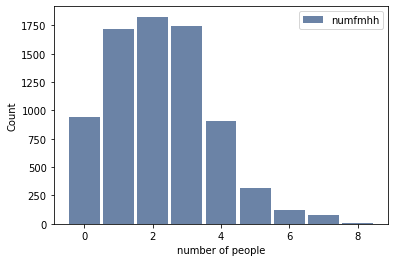

In [ ]:
# Solution

hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Config(xlabel='number of people', ylabel='Count')


Make a histogram of parity, the number of children borne by the respondent

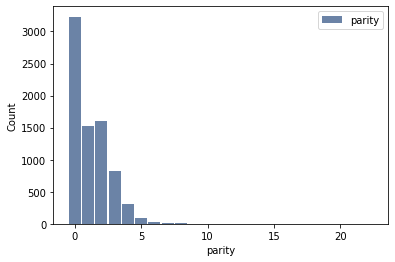

In [ ]:
# Solution

# This distribution is positive-valued and skewed to the right.

hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

Use Hist.Largest to find the largest values of parity.

In [ ]:
# Solution

hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity. Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question. But for now let's take it at face value.

Use totincr to select the respondents with the highest income (level 14). Plot the histogram of parity for just the high income respondents.

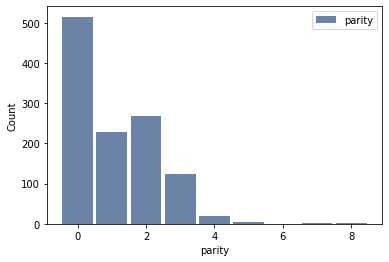

In [ ]:
# Solution

rich = resp[resp.totincr == 14]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')


Find the largest parities for high income respondents.

In [ ]:


# Solution

hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean parity for high income respondents and others.

In [ ]:
# Solution

not_rich = resp[resp.totincr < 14]
rich.parity.mean(), not_rich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

In [ ]:
# Solution

# This effect is about 10 times stronger than the difference in pregnancy length.
# But remembering the design of the study, we should not make too much of this
# apparent effect.

CohenEffectSize(rich.parity, not_rich.parity)


-0.12511855314660367